In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

#for charts and graphs
import matplotlib.pyplot as plt
import seaborn as sns


# importing library from the d helper functions
import random
from helper_functions import train_test_split, calculate_accuracy


# importing sklearn library for graph library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# imporitng library from the decision_tree_functions 
from decision_tree_functions import decision_tree_algorithm, decision_tree_predictions
from helper_functions import train_test_split, calculate_accuracy

In [2]:
churn_data = pd.read_csv("churn.csv")
churn_data.shape     # data are imported from the churn.csv

(10200, 14)

In [3]:
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,10196,15688287,Lopez,608.0,France,Female,29.0,8,87654.32,1,1,1,105432.09,0
10196,10197,15672361,Kumar,614.0,Spain,Male,NaN,3,109876.54,2,0,0,98076.54,1
10197,10198,15686440,Cooper,672.0,Germany,Male,35.0,5,93456.67,3,1,1,NaN,0
10198,10199,15688288,Scott,628.0,France,Female,39.0,1,87654.32,2,1,1,113456.78,1


<h1>Exploratory Data Analysis</h1>

In [4]:
churn_data.info()    # provides the columns information such as data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10200 non-null  int64  
 1   CustomerId       10200 non-null  int64  
 2   Surname          10200 non-null  object 
 3   CreditScore      10157 non-null  float64
 4   Geography        10200 non-null  object 
 5   Gender           10200 non-null  object 
 6   Age              10169 non-null  float64
 7   Tenure           10200 non-null  int64  
 8   Balance          10163 non-null  float64
 9   NumOfProducts    10200 non-null  int64  
 10  HasCrCard        10200 non-null  int64  
 11  IsActiveMember   10200 non-null  int64  
 12  EstimatedSalary  10137 non-null  float64
 13  Exited           10200 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


In [5]:
churn_data.describe()    # describes the count, mean, standard deviation, minimum value, max vlaue similarly value in 25 %, 50%, 70%

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10200.000000,1.020000e+04,10157.000000,10169.000000,10200.000000,10163.000000,10200.000000,10200.000000,10200.000000,10137.000000,10200.000000
mean,5100.500000,1.569074e+07,650.305011,38.877372,5.024412,76840.879872,1.537549,0.702843,0.518333,100163.860149,0.209510
std,2944.630707,7.125705e+04,96.075189,10.426167,2.890710,61990.440314,0.587948,0.457029,0.499688,57133.293931,0.406979
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2550.750000,1.562975e+07,585.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51703.090000,0.000000
50%,5100.500000,1.568845e+07,651.000000,37.000000,5.000000,97133.920000,1.000000,1.000000,1.000000,100557.030000,0.000000
75%,7650.250000,1.575206e+07,717.000000,44.000000,8.000000,127274.030000,2.000000,1.000000,1.000000,148611.520000,0.000000
max,10200.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [6]:
churn_data.nunique()   # gives the idea about the number of unique value in the columns

RowNumber          10200
CustomerId         10171
Surname             2935
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6403
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    10034
Exited                 2
dtype: int64

In [7]:
have_leaved=churn_data[churn_data['Exited'] ==1]
have_leaved     # this determines how many poeple have left

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645.0,Spain,Male,44.0,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376.0,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653.0,Germany,Male,58.0,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,10191,15672360,Patel,616.0,Spain,Male,41.0,8,109876.54,3,1,1,NaN,1
10192,10193,15688286,Moore,NaN,France,Female,32.0,10,87654.32,1,1,1,120987.65,1
10194,10195,15686340,Wilson,630.0,Germany,Male,43.0,7,93456.67,2,1,0,113456.78,1
10196,10197,15672361,Kumar,614.0,Spain,Male,NaN,3,109876.54,2,0,0,98076.54,1


In [8]:
have_stayed= churn_data[churn_data['Exited'] == 0]
have_stayed   # this code displays the no of  poeple who styaed in the company

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822.0,France,Male,50.0,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501.0,France,Male,44.0,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10191,10192,15686439,Moore,625.0,Germany,Male,36.0,3,93456.67,2,0,0,105432.09,0
10193,10194,15673230,Cooper,656.0,Spain,Male,30.0,2,109876.54,3,0,1,NaN,0
10195,10196,15688287,Lopez,608.0,France,Female,29.0,8,87654.32,1,1,1,105432.09,0
10197,10198,15686440,Cooper,672.0,Germany,Male,35.0,5,93456.67,3,1,1,NaN,0


In [9]:
churn_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10200 non-null  int64  
 1   CustomerId       10200 non-null  int64  
 2   Surname          10200 non-null  object 
 3   CreditScore      10157 non-null  float64
 4   Geography        10200 non-null  object 
 5   Gender           10200 non-null  object 
 6   Age              10169 non-null  float64
 7   Tenure           10200 non-null  int64  
 8   Balance          10163 non-null  float64
 9   NumOfProducts    10200 non-null  int64  
 10  HasCrCard        10200 non-null  int64  
 11  IsActiveMember   10200 non-null  int64  
 12  EstimatedSalary  10137 non-null  float64
 13  Exited           10200 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


In [10]:
#categorial Varaibles
categorial_varaibles = [column for column in churn_data.columns if column in "O" or
                        churn_data[column].nunique() <= 11 and
                        column not in "Exited"]

categorial_varaibles      
#given the two conditions if the word contains letter o or if the values of the 
#columns is less then 11 and does not affect churn directly

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [11]:
tenurecount_stayed=have_stayed["Tenure"].value_counts()
tenurecount_leaved=have_leaved["Tenure"].value_counts()

print("this is not churned data: \n",tenurecount_stayed )
print("this is churned data: \n",tenurecount_leaved )      # people who left and stayed according to their tenure.

this is not churned data: 
 7     860
2     853
8     839
1     812
5     812
3     807
4     795
9     785
6     783
10    399
0     318
Name: Tenure, dtype: int64
this is churned data: 
 1     239
5     220
3     219
9     219
2     216
4     214
8     212
6     208
7     188
10    107
0      95
Name: Tenure, dtype: int64


In [12]:
Procount_stayed=have_stayed["NumOfProducts"].value_counts()
Procount_leaved=have_leaved["NumOfProducts"].value_counts()

print("this is not churned data: \n", Procount_stayed )
print("this is churned data: \n", Procount_leaved )       # people who have left according to number of other banks account they have

this is not churned data: 
 2    4279
1    3711
3      73
Name: NumOfProducts, dtype: int64
this is churned data: 
 1    1441
2     394
3     242
4      60
Name: NumOfProducts, dtype: int64


In [13]:
cardcount_stayed=have_stayed["HasCrCard"].value_counts()
cardcount_leaved=have_leaved["HasCrCard"].value_counts()

print("this is not churned data: \n", cardcount_stayed )
print("this is churned data: \n", cardcount_leaved )     # people who have stayed and left according if the customer has credit card 

this is not churned data: 
 1    5685
0    2378
Name: HasCrCard, dtype: int64
this is churned data: 
 1    1484
0     653
Name: HasCrCard, dtype: int64


In [14]:

Membercount_stayed=have_stayed["IsActiveMember"].value_counts()
Membercount_leaved=have_leaved["IsActiveMember"].value_counts()

print("this is not churned data: \n", Membercount_stayed )
print("this is churned data: \n", Membercount_leaved )
# people who have left according their activity in the bank

this is not churned data: 
 1    4486
0    3577
Name: IsActiveMember, dtype: int64
this is churned data: 
 0    1336
1     801
Name: IsActiveMember, dtype: int64


In [15]:
churn_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10200 non-null  int64  
 1   CustomerId       10200 non-null  int64  
 2   Surname          10200 non-null  object 
 3   CreditScore      10157 non-null  float64
 4   Geography        10200 non-null  object 
 5   Gender           10200 non-null  object 
 6   Age              10169 non-null  float64
 7   Tenure           10200 non-null  int64  
 8   Balance          10163 non-null  float64
 9   NumOfProducts    10200 non-null  int64  
 10  HasCrCard        10200 non-null  int64  
 11  IsActiveMember   10200 non-null  int64  
 12  EstimatedSalary  10137 non-null  float64
 13  Exited           10200 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


In [16]:

Gendercount_stayed=have_stayed["Gender"].value_counts() 
Gendercount_leaved=have_leaved["Gender"].value_counts()

print("this is not churned data: \n", Gendercount_stayed )
print("this is churned data: \n", Gendercount_leaved )
# according to the gender if people have left the bank according to their gender

this is not churned data: 
 Male      4619
Female    3444
Name: Gender, dtype: int64
this is churned data: 
 Female    1179
Male       958
Name: Gender, dtype: int64


<h1>Data Visualization</h1>

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

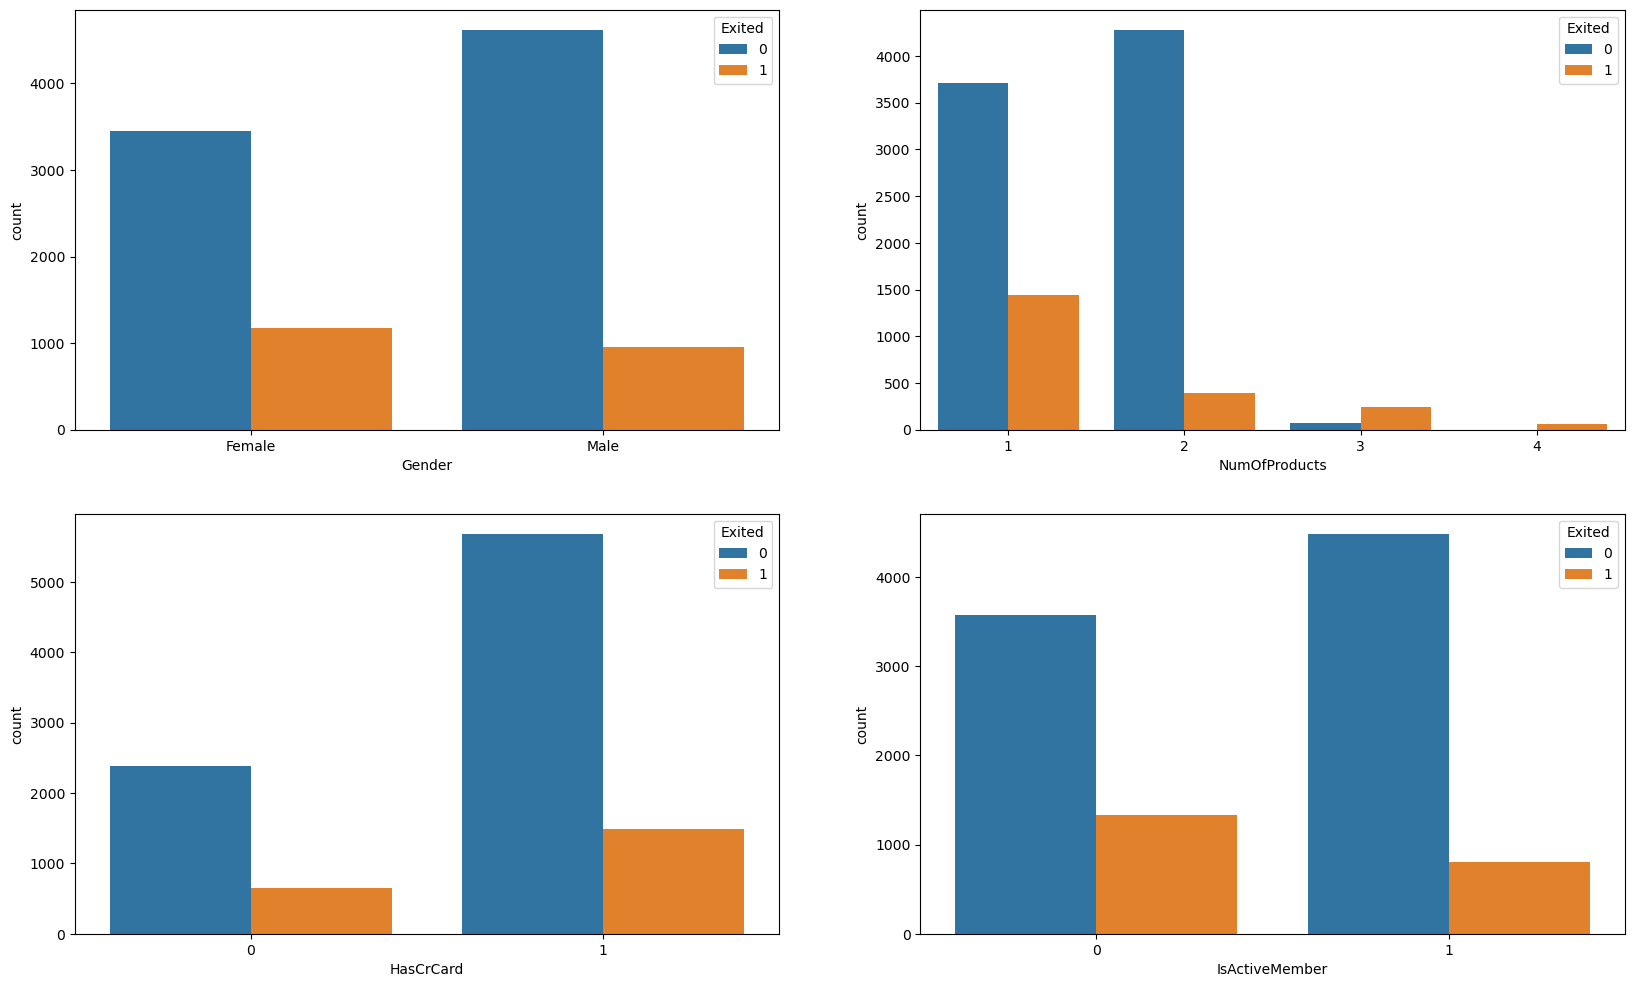

In [17]:

#checking the values with the churn customer and categorial variables

fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Gender', hue = 'Exited', data = churn_data, ax=axarr[0][0])
sns.countplot(x='NumOfProducts', hue = 'Exited', data = churn_data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited', data = churn_data, ax=axarr[1][0] )
sns.countplot(x='IsActiveMember', hue = 'Exited', data = churn_data,  ax=axarr[1][1])

In [18]:
#numeric varaibles

numeric_varaibles = [column for column in churn_data.columns if churn_data[column].dtype != "object" 
                     and churn_data[column].nunique() >11]
numeric_varaibles

# column is merice if values is not object and its value is bigger then 11

['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

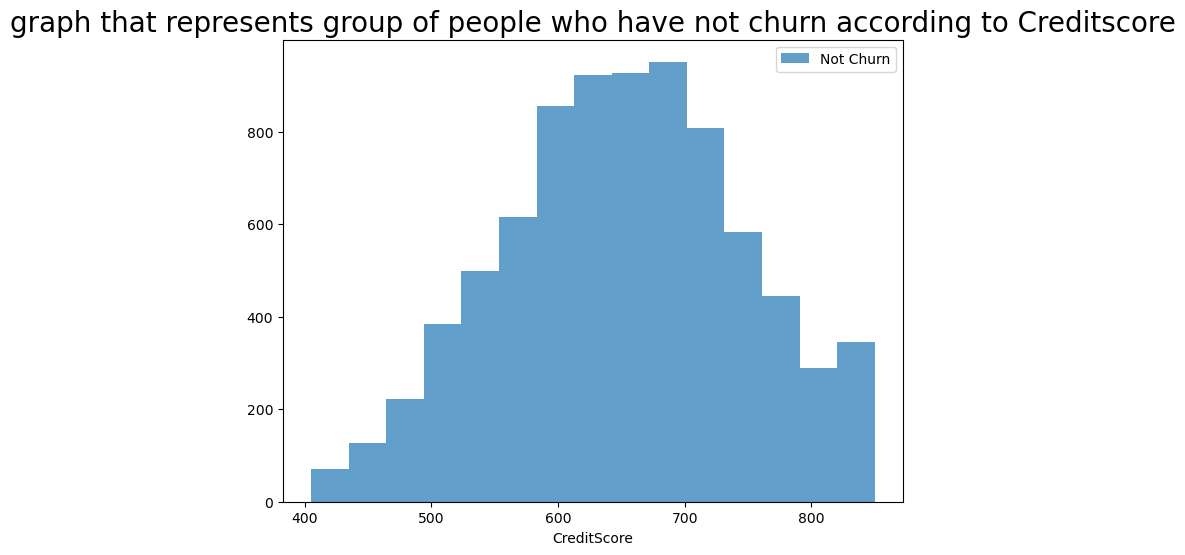

In [19]:
plt.figure(figsize=(8,6))
plt.xlabel('CreditScore')
plt.hist(have_stayed["CreditScore"],bins=15, alpha=0.7, label='Not Churn')
plt.legend(loc='upper right')
plt.title("graph that represents group of people who have not churn according to Creditscore", size = 20)
plt.show()

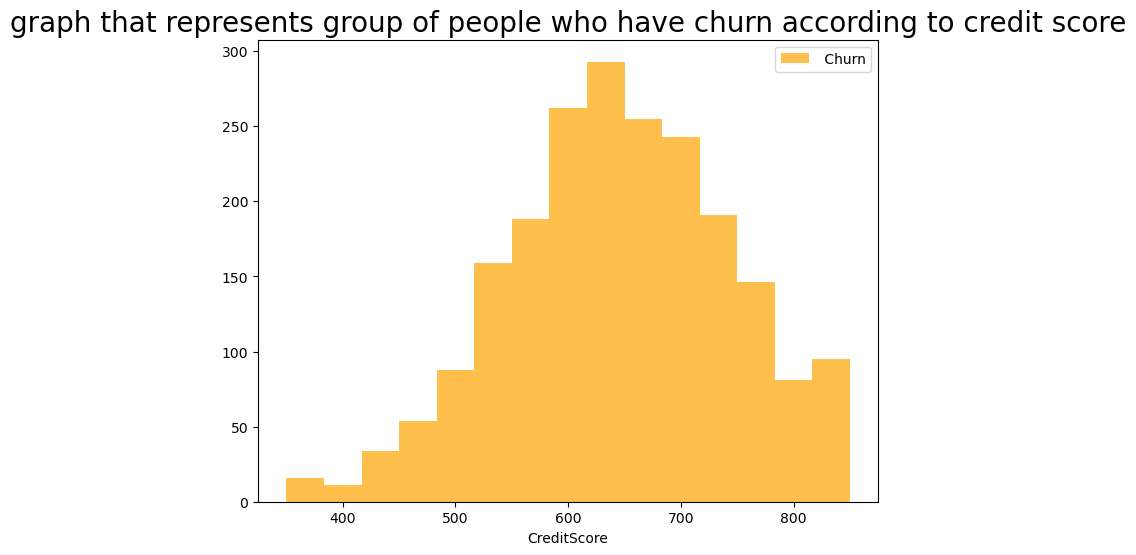

In [20]:
plt.figure(figsize=(8,6))
plt.xlabel('CreditScore')
plt.hist(have_leaved["CreditScore"],bins=15, alpha=0.7, label=' Churn', color='orange')
plt.legend(loc='upper right')
plt.title("graph that represents group of people who have churn according to credit score", size = 20)
plt.show()

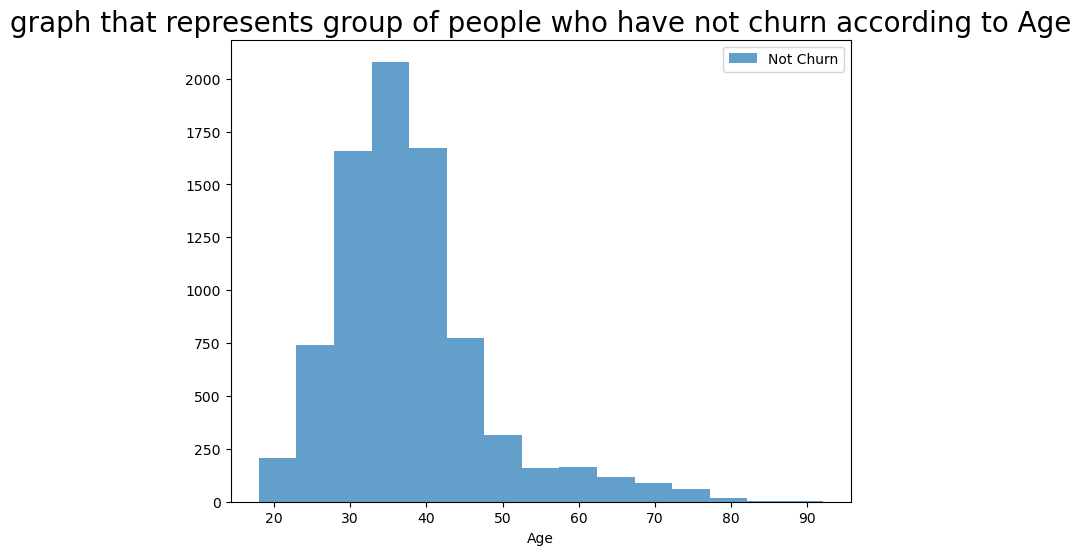

In [21]:
plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.hist(have_stayed["Age"],bins=15, alpha=0.7, label='Not Churn')
plt.legend(loc='upper right')
plt.title("graph that represents group of people who have not churn according to Age", size = 20)
plt.show()

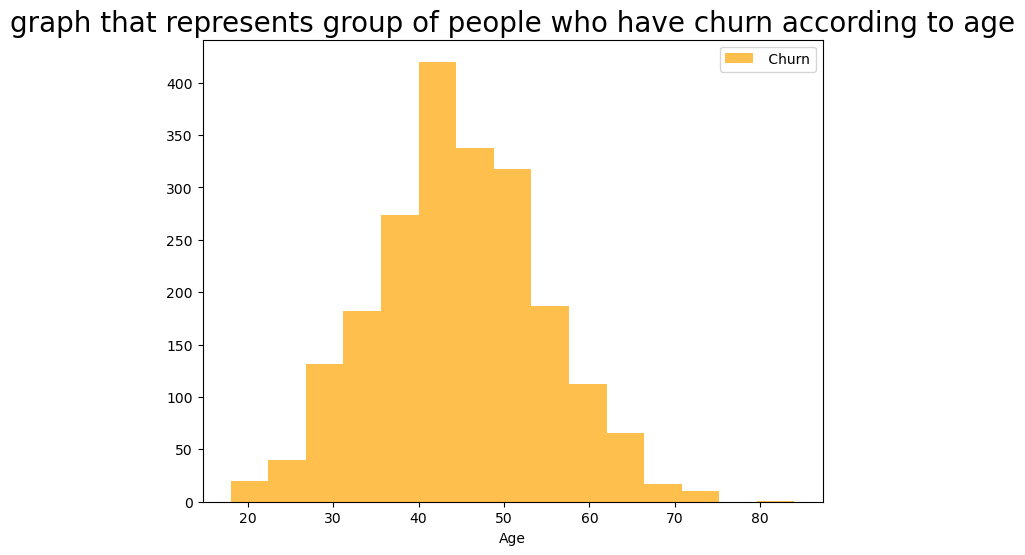

In [22]:
plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.hist(have_leaved["Age"],bins=15, alpha=0.7, label=' Churn', color='orange')
plt.legend(loc='upper right')
plt.title("graph that represents group of people who have churn according to age", size = 20)
plt.show()

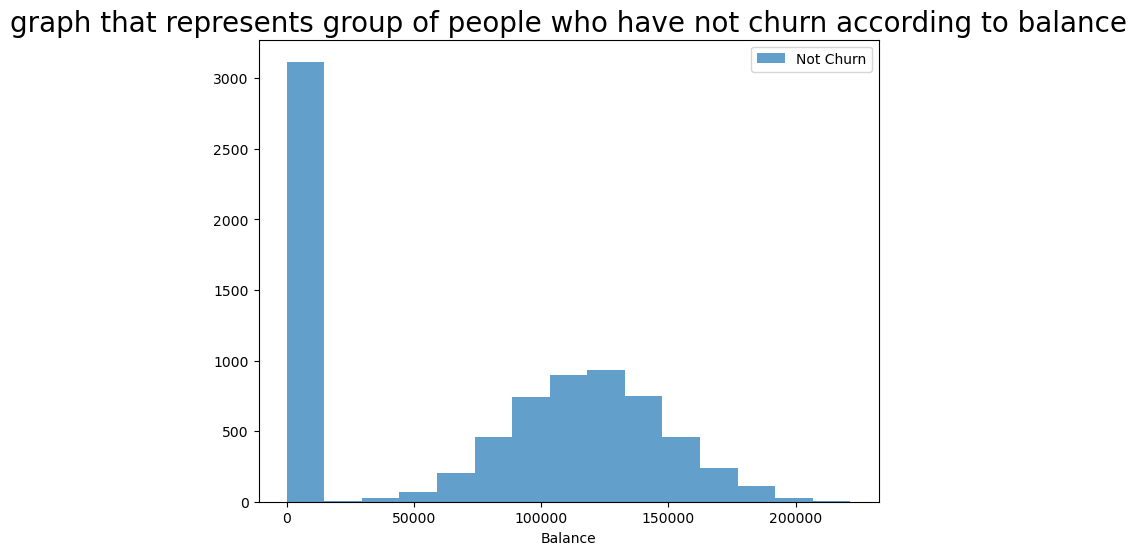

In [23]:
plt.figure(figsize=(8,6))
plt.xlabel('Balance')
plt.hist(have_stayed["Balance"],bins=15, alpha=0.7, label='Not Churn')
plt.legend(loc='upper right')
plt.title("graph that represents group of people who have not churn according to balance", size = 20)
plt.show()

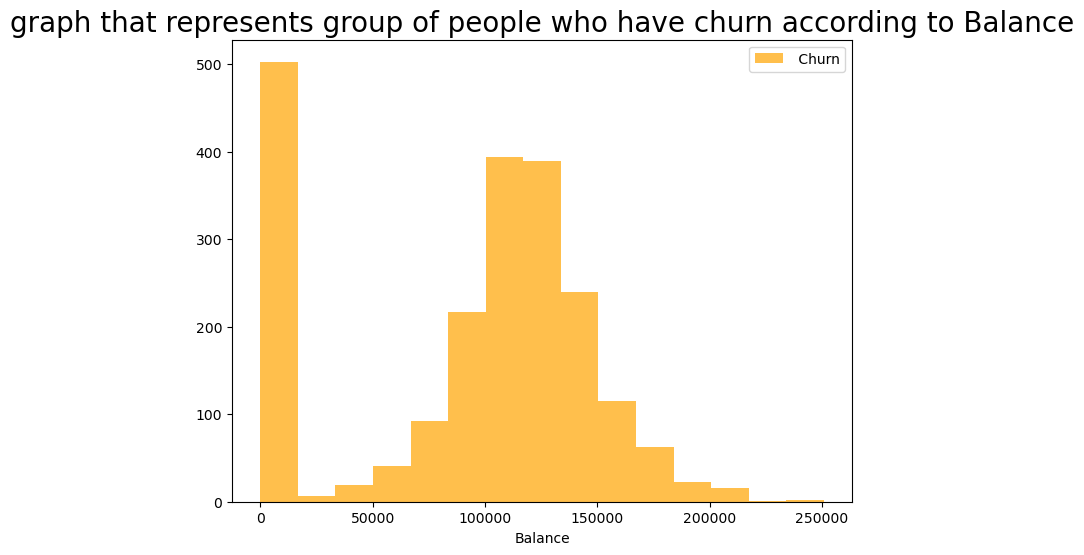

In [24]:
plt.figure(figsize=(8,6))
plt.xlabel('Balance')
plt.hist(have_leaved["Balance"],bins=15, alpha=0.7, label=' Churn', color='orange')
plt.legend(loc='upper right')
plt.title("graph that represents group of people who have churn according to Balance", size = 20)
plt.show()

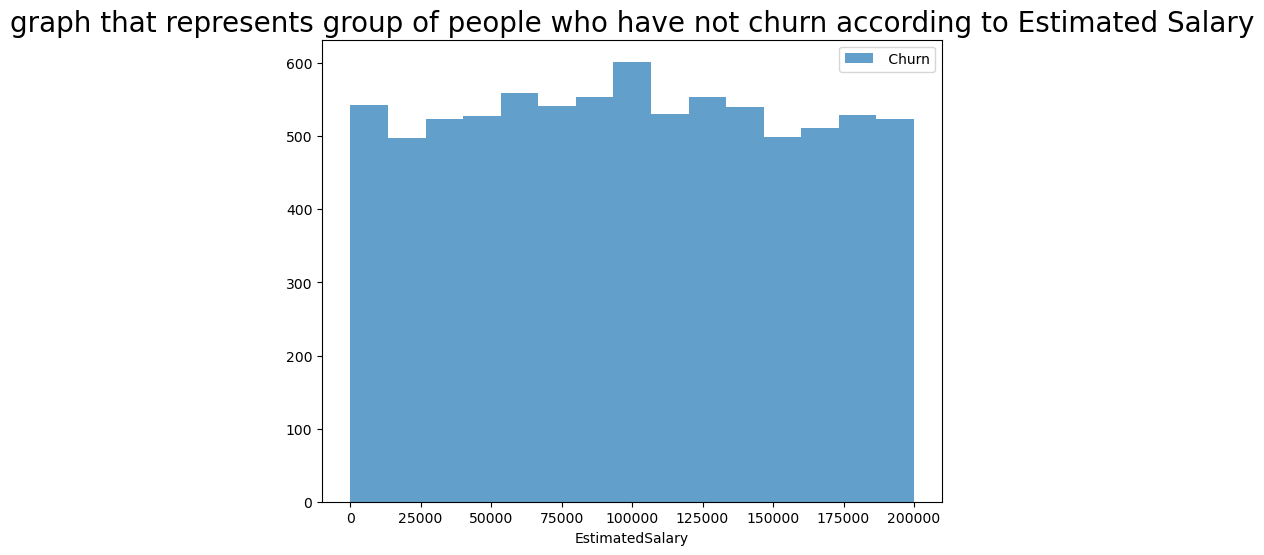

In [25]:
plt.figure(figsize=(8,6))
plt.xlabel('EstimatedSalary')
plt.hist(have_stayed["EstimatedSalary"],bins=15, alpha=0.7, label=' Churn')
plt.legend(loc='upper right')
plt.title("graph that represents group of people who have not churn according to Estimated Salary", size = 20)
plt.show()

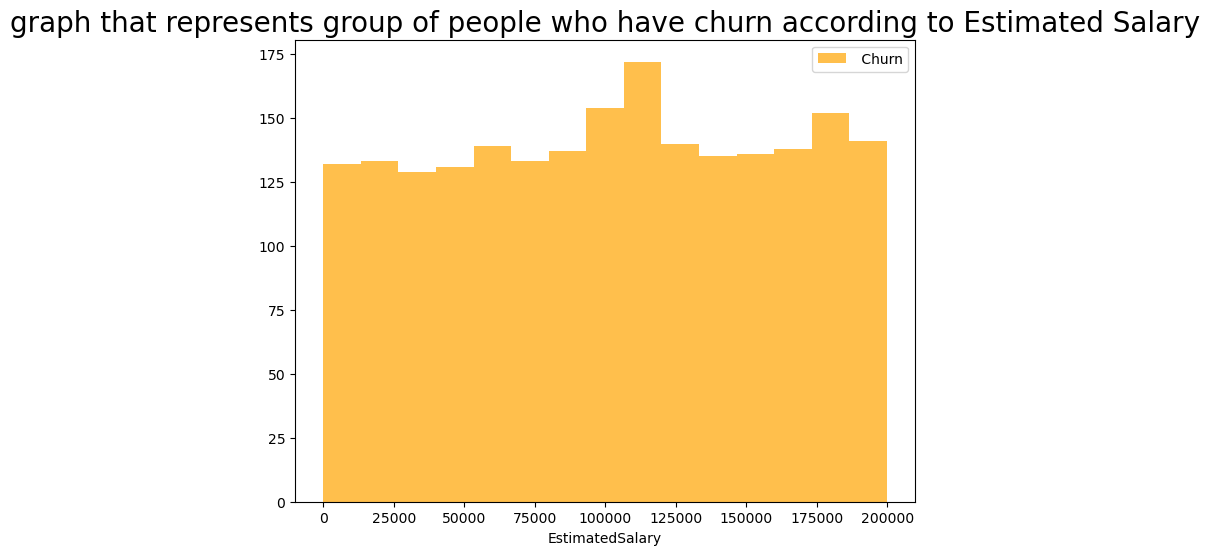

In [26]:
plt.figure(figsize=(8,6))
plt.xlabel('EstimatedSalary')
plt.hist(have_leaved["EstimatedSalary"],bins=15, alpha=0.7, label=' Churn', color='orange')
plt.title("graph that represents group of people who have churn according to Estimated Salary", size = 20)
plt.legend(loc='upper right')
plt.show()

In [27]:
churn_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10200 non-null  int64  
 1   CustomerId       10200 non-null  int64  
 2   Surname          10200 non-null  object 
 3   CreditScore      10157 non-null  float64
 4   Geography        10200 non-null  object 
 5   Gender           10200 non-null  object 
 6   Age              10169 non-null  float64
 7   Tenure           10200 non-null  int64  
 8   Balance          10163 non-null  float64
 9   NumOfProducts    10200 non-null  int64  
 10  HasCrCard        10200 non-null  int64  
 11  IsActiveMember   10200 non-null  int64  
 12  EstimatedSalary  10137 non-null  float64
 13  Exited           10200 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

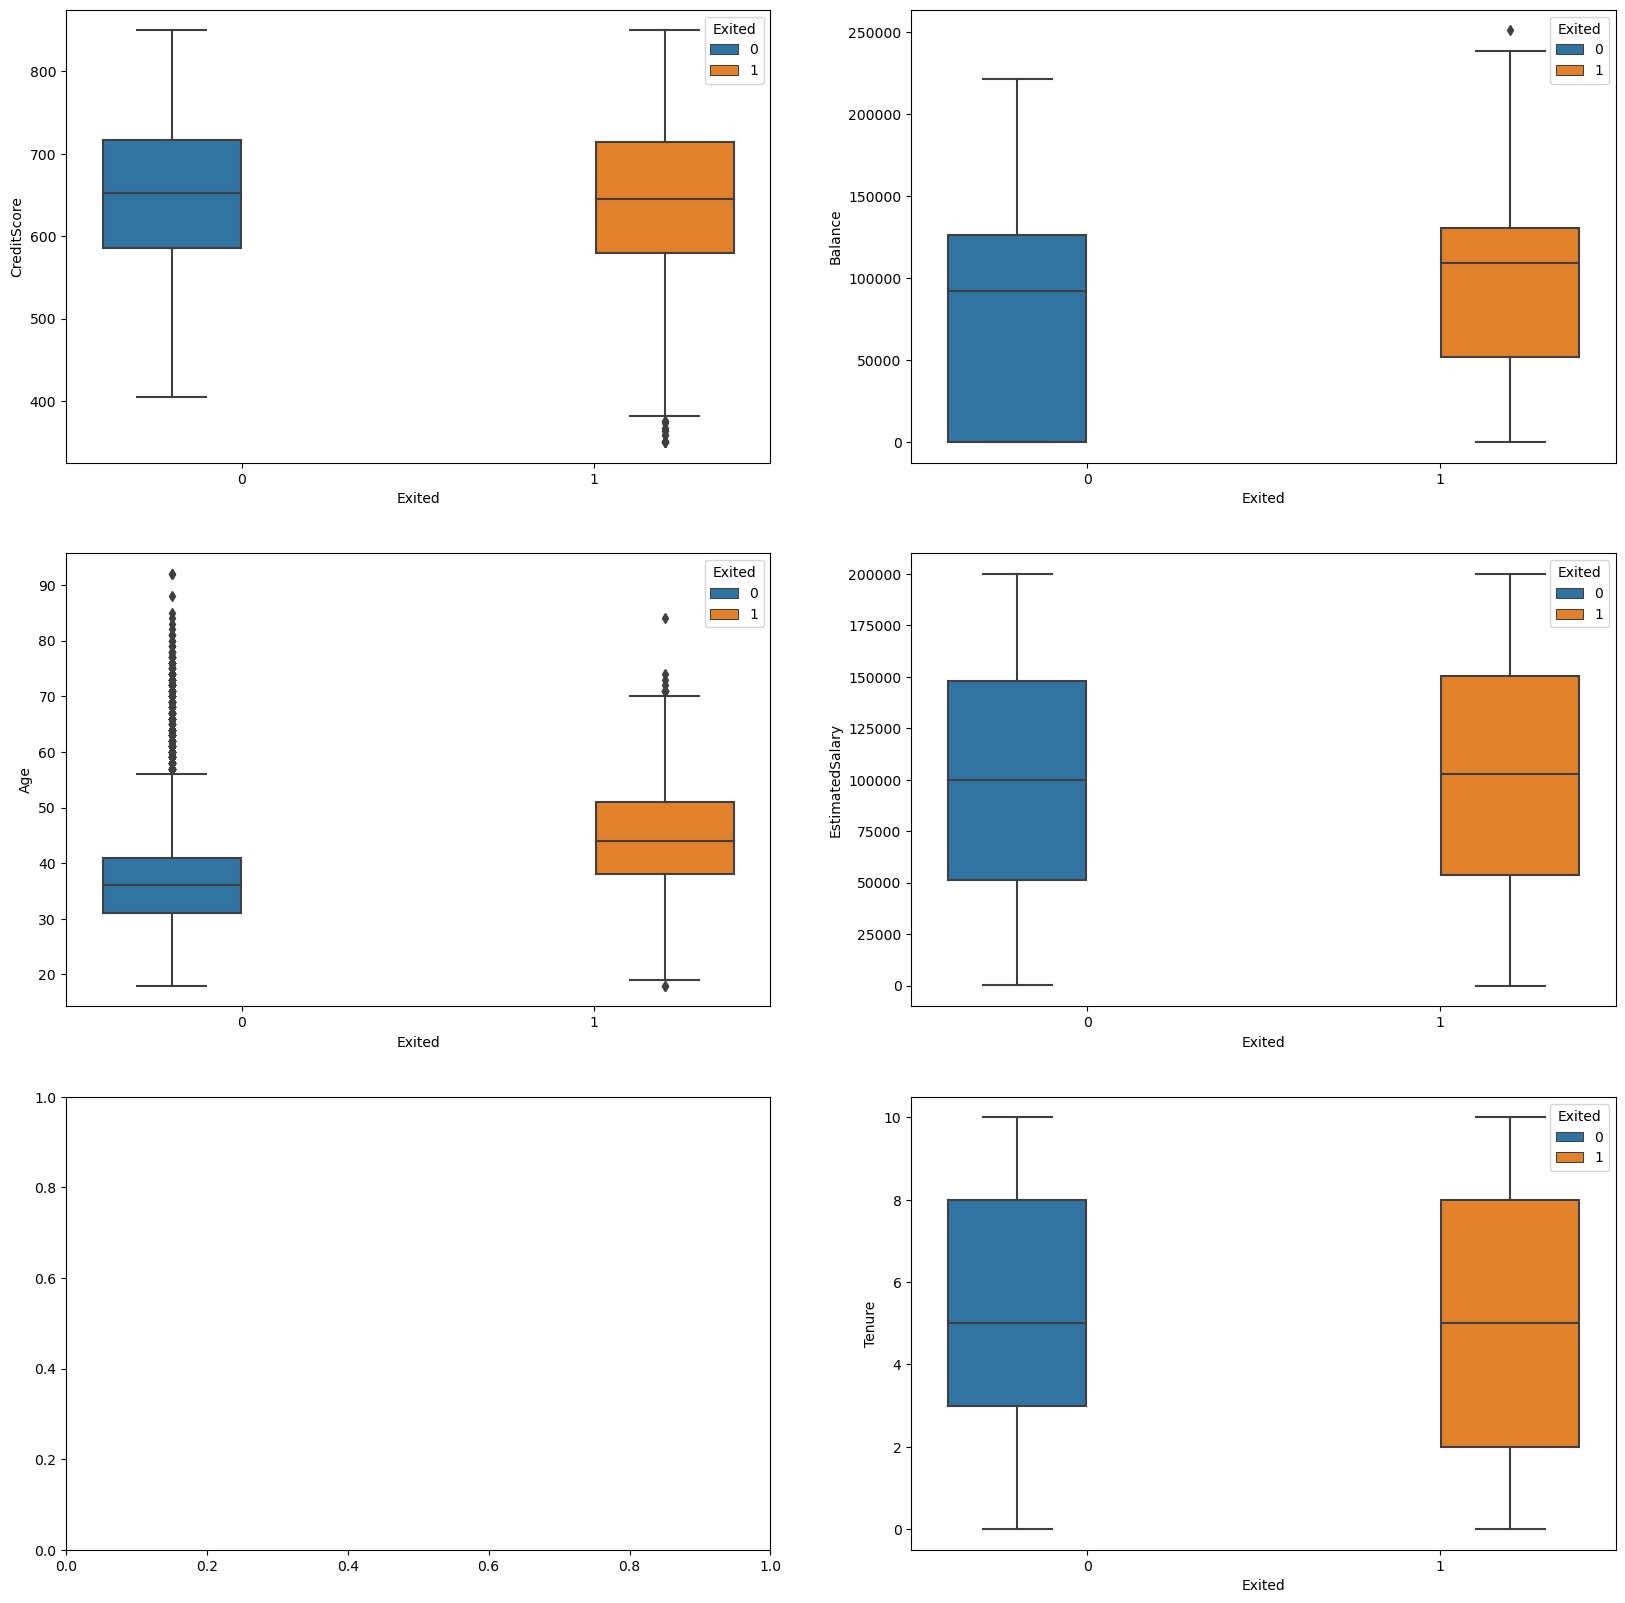

In [28]:

#churn customer ccording to age, creditscore, tenure, balance, Num of products, eztin=mated salary

fig, axarr = plt.subplots(3,2, figsize=(20,20))
sns.boxplot(y='CreditScore', x ='Exited', hue = 'Exited', data = churn_data, ax=axarr[0,0])
sns.boxplot(y='Balance', x ='Exited', hue = 'Exited', data = churn_data, ax=axarr[0,1])
sns.boxplot(y='Age', x ='Exited', hue = 'Exited', data = churn_data, ax=axarr[1,0])
sns.boxplot(y='EstimatedSalary', x ='Exited', hue = 'Exited', data = churn_data, ax=axarr[1,1])
sns.boxplot(y='Tenure', x ='Exited', hue = 'Exited', data = churn_data, ax=axarr[2,1])

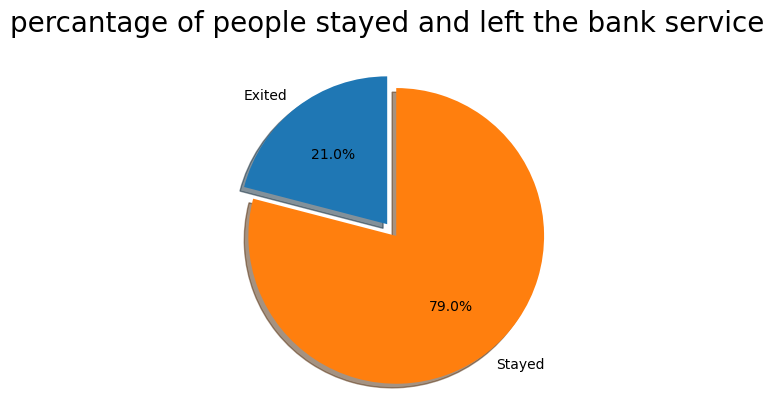

In [29]:
labels = 'Exited', 'Stayed'
sizes = [churn_data.Exited[churn_data['Exited']==1].count(), churn_data.Exited[churn_data['Exited']==0].count()]
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("percantage of people stayed and left the bank service", size = 20)
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    8063
1    2137
Name: Exited, dtype: int64

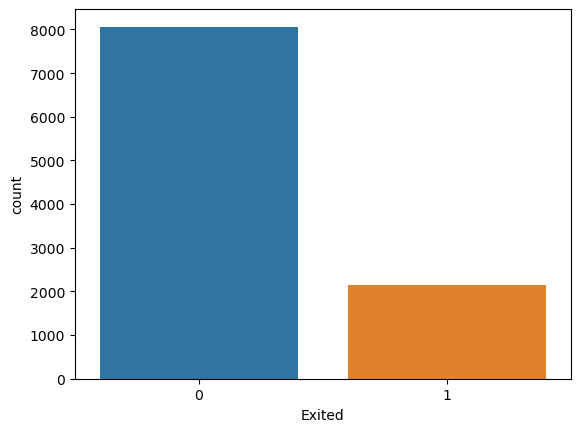

In [30]:
# handling uneven data 
sns.countplot(churn_data['Exited'])
churn_data['Exited'].value_counts()

#(churn_data.Exited ==1).sum()
#(churn_data.Exited ==0).sum()   trying

<AxesSubplot:>

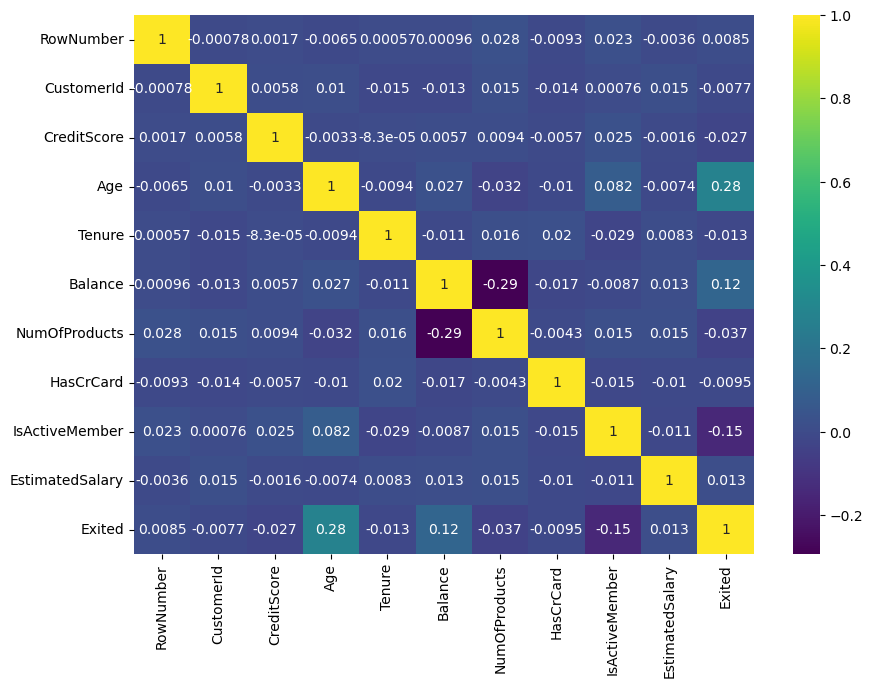

In [31]:
# Correlation Matrix
plt.figure(figsize=(10,7))
sns.heatmap(churn_data.corr(),annot=True, cmap = 'viridis')

In [32]:
churn_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10200 non-null  int64  
 1   CustomerId       10200 non-null  int64  
 2   Surname          10200 non-null  object 
 3   CreditScore      10157 non-null  float64
 4   Geography        10200 non-null  object 
 5   Gender           10200 non-null  object 
 6   Age              10169 non-null  float64
 7   Tenure           10200 non-null  int64  
 8   Balance          10163 non-null  float64
 9   NumOfProducts    10200 non-null  int64  
 10  HasCrCard        10200 non-null  int64  
 11  IsActiveMember   10200 non-null  int64  
 12  EstimatedSalary  10137 non-null  float64
 13  Exited           10200 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


<h1>Data Preparation</h1>

In [33]:
churn_data.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore        43
Geography           0
Gender              0
Age                31
Tenure              0
Balance            37
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary    63
Exited              0
dtype: int64

In [34]:
churn_data = churn_data.dropna()  #null values are droped here
churn_data.isnull().sum()        

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [35]:
churn_data = churn_data.drop('Geography', axis = 1)   # geography is not needed in the prediction 

In [36]:
churn_data = churn_data.drop('CustomerId', axis = 1) 

In [37]:
churn_data = churn_data.drop('Surname', axis = 1)    # Surname is not needed in the prediction 

In [38]:

churn_data = churn_data.drop('RowNumber', axis = 1)     # RowNumber is not needed in the prediction 

In [39]:
#checking a duplicate value 

duplicates=churn_data.duplicated().sum()
print("the duplicated data are: ",duplicates)


the duplicated data are:  3


In [40]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10033 entries, 0 to 10198
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10033 non-null  float64
 1   Gender           10033 non-null  object 
 2   Age              10033 non-null  float64
 3   Tenure           10033 non-null  int64  
 4   Balance          10033 non-null  float64
 5   NumOfProducts    10033 non-null  int64  
 6   HasCrCard        10033 non-null  int64  
 7   IsActiveMember   10033 non-null  int64  
 8   EstimatedSalary  10033 non-null  float64
 9   Exited           10033 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 862.2+ KB


In [41]:
#handling unmanaged or outliers data 
containing_outliers = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for i in containing_outliers :
    mean_value = churn_data[i].mean()
    std_value = churn_data[i].std()
    churn_data = churn_data[(churn_data[i] >= mean_value - 3 * std_value) & (churn_data[i] <=mean_value + 3 * std_value)] 

In [42]:
churn_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9832 entries, 0 to 10198
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9832 non-null   float64
 1   Gender           9832 non-null   object 
 2   Age              9832 non-null   float64
 3   Tenure           9832 non-null   int64  
 4   Balance          9832 non-null   float64
 5   NumOfProducts    9832 non-null   int64  
 6   HasCrCard        9832 non-null   int64  
 7   IsActiveMember   9832 non-null   int64  
 8   EstimatedSalary  9832 non-null   float64
 9   Exited           9832 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 844.9+ KB


In [43]:
#converting any str object to int 

churn_data['Balance'] = pd.to_numeric(churn_data['Balance'], errors='coerce')
churn_data['CreditScore'] = pd.to_numeric(churn_data['CreditScore'], errors='coerce')
churn_data['Age'] = pd.to_numeric(churn_data['Age'], errors='coerce')
churn_data['Tenure'] = pd.to_numeric(churn_data['Tenure'], errors='coerce')
churn_data['NumOfProducts'] = pd.to_numeric(churn_data['NumOfProducts'], errors='coerce')
churn_data['EstimatedSalary'] = pd.to_numeric(churn_data['EstimatedSalary'], errors='coerce')
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9832 entries, 0 to 10198
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9832 non-null   float64
 1   Gender           9832 non-null   object 
 2   Age              9832 non-null   float64
 3   Tenure           9832 non-null   int64  
 4   Balance          9832 non-null   float64
 5   NumOfProducts    9832 non-null   int64  
 6   HasCrCard        9832 non-null   int64  
 7   IsActiveMember   9832 non-null   int64  
 8   EstimatedSalary  9832 non-null   float64
 9   Exited           9832 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 844.9+ KB


In [44]:
churn_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
10188,621.0,Male,28.0,4,93456.67,1,1,1,100345.67,1
10191,625.0,Male,36.0,3,93456.67,2,0,0,105432.09,0
10194,630.0,Male,43.0,7,93456.67,2,1,0,113456.78,1
10195,608.0,Female,29.0,8,87654.32,1,1,1,105432.09,0


In [45]:
# converting str column into int or binary vector

gender_map = {'Male':1, 'Female':0}
churn_data['Gender'] = churn_data['Gender'].replace(gender_map)

In [46]:
churn_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,0,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,0,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,0,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
10188,621.0,1,28.0,4,93456.67,1,1,1,100345.67,1
10191,625.0,1,36.0,3,93456.67,2,0,0,105432.09,0
10194,630.0,1,43.0,7,93456.67,2,1,0,113456.78,1
10195,608.0,0,29.0,8,87654.32,1,1,1,105432.09,0


<h3>Feature Scaling</h3>


In [47]:
# the dataset is imbalanced till now 

# from here oversampling is done to match the number


churn_data['label'] = churn_data.Exited
churn_data = churn_data.drop('Exited', axis = 1)
churn_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,label
0,619.0,0,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,0,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,0,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,0,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
10188,621.0,1,28.0,4,93456.67,1,1,1,100345.67,1
10191,625.0,1,36.0,3,93456.67,2,0,0,105432.09,0
10194,630.0,1,43.0,7,93456.67,2,1,0,113456.78,1
10195,608.0,0,29.0,8,87654.32,1,1,1,105432.09,0


In [48]:
import seaborn as sns

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    7863
1    1969
Name: label, dtype: int64

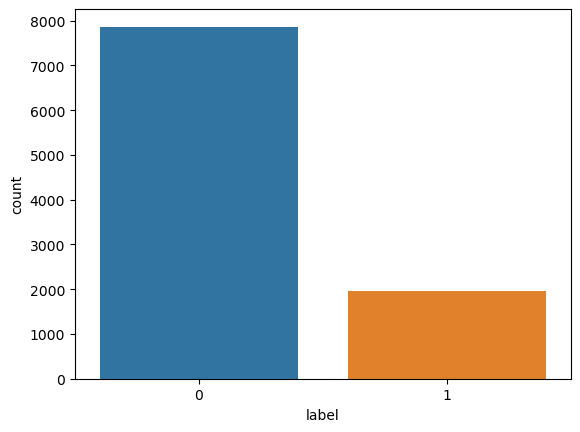

In [49]:
# the display of the data oversampling 

sns.countplot(churn_data['label'])
churn_data['label'].value_counts()

In [50]:
# the given is the handling the oversampling from SMOTE



churn_data_data = churn_data.drop('label',axis=1)
churn_label = churn_data.label


from imblearn.over_sampling import SMOTE
new_churn_data, new_churn_label = SMOTE().fit_resample(churn_data_data, churn_label)
new_churn_data.value_counts()

CreditScore  Gender  Age       Tenure  Balance        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary
502.000000   0       42.00000  8       159660.800000  3              1          0               113931.570000      3
619.000000   0       42.00000  2       0.000000       1              1          1               101348.880000      2
608.000000   0       41.00000  1       83807.860000   1              0          1               112542.580000      2
690.000000   1       54.00000  5       0.000000       1              1          0               12847.610000       1
690.380524   1       44.14412  2       118590.146188  1              1          0               10388.597972       1
                                                                                                                  ..
609.000000   1       31.00000  9       103837.750000  1              1          1               150218.110000      1
                     32.00000  4       99883.160000   1              

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    7863
0    7863
Name: label, dtype: int64

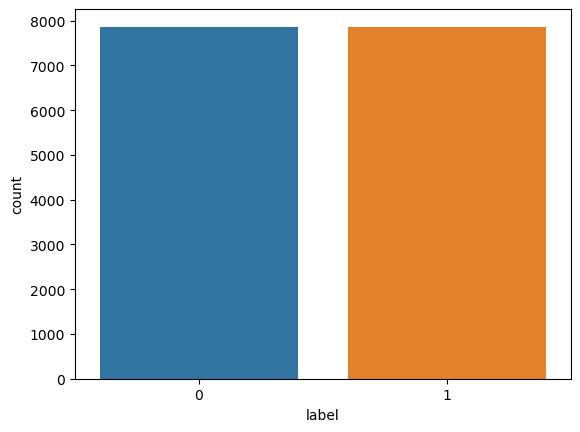

In [51]:
new_churn_data['label'] = new_churn_label
sns.countplot(new_churn_data['label'])
new_churn_data['label'].value_counts()

In [52]:
churn_data = new_churn_data

<h1>Model Training</h1>

In [53]:

random.seed(0)
train_churn, test_churn = train_test_split(churn_data, test_size=0.3)
train_churn, valid_churn = train_test_split(churn_data, test_size = 0.3)

In [54]:
train_churn

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,label
1,608.000000,0,41.000000,1,83807.860000,1,0,1,112542.580000,0
2,502.000000,0,42.000000,8,159660.800000,3,1,0,113931.570000,1
3,699.000000,0,39.000000,1,0.000000,2,0,0,93826.630000,0
4,850.000000,0,43.000000,2,125510.820000,1,1,1,79084.100000,0
5,645.000000,1,44.000000,8,113755.780000,2,1,0,149756.710000,1
...,...,...,...,...,...,...,...,...,...,...
15717,751.493194,0,38.975926,2,0.000000,1,0,0,134702.403873,1
15720,759.972212,0,47.597032,2,0.000000,1,1,0,161067.739460,1
15722,669.935594,1,54.658759,0,178252.866822,1,0,0,23181.944663,1
15723,623.792228,0,41.872017,2,170558.281808,1,1,0,138559.863033,1


In [55]:
test_churn

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,label
13835,656.240678,0,36.327064,5,76751.363051,1,0,0,36467.729451,1
6311,790.000000,0,47.000000,10,148636.210000,1,0,1,16119.960000,1
12418,772.929430,0,58.612342,4,116379.098281,1,1,0,94195.083884,1
14585,614.625671,0,49.166539,5,104003.591360,1,0,1,165987.481297,1
6890,677.000000,0,27.000000,2,0.000000,2,0,1,114685.920000,0
...,...,...,...,...,...,...,...,...,...,...
10430,563.508485,1,53.775141,1,109593.820548,1,1,0,53527.394676,1
14656,509.962511,0,39.715213,2,138172.576806,1,1,0,38966.832417,1
12474,654.224522,0,40.290421,5,140098.613002,1,0,0,133855.170680,1
9828,625.000000,1,36.000000,3,93456.670000,2,0,0,105432.090000,0


In [56]:
valid_churn

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,label
10926,772.963048,0,51.713827,8,166086.766243,1,0,0,61628.731211,1
14231,650.169347,1,55.313200,6,93197.197524,1,0,0,52536.021996,1
15253,573.465849,1,52.343257,3,0.000000,1,1,0,11922.133940,1
3083,756.000000,1,60.000000,2,0.000000,1,1,1,166513.490000,1
10070,455.994446,0,32.213042,3,135572.134867,1,0,0,150392.503571,1
...,...,...,...,...,...,...,...,...,...,...
7153,663.000000,0,37.000000,8,155303.710000,1,1,0,118716.630000,0
13362,745.770445,0,40.092348,5,0.000000,1,1,0,28279.516360,1
11323,638.764625,0,52.168097,4,140959.059186,1,1,0,191419.558701,1
7276,622.000000,1,29.000000,7,101486.960000,1,1,1,8788.350000,0


In [57]:
def bootstrapping(train_df, n_bootstrap):
    bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
    df_bootstrapped = train_df.iloc[bootstrap_indices]
    
    return df_bootstrapped

def random_forest_algorithm(train_df, n_trees, n_bootstrap, n_features, dt_max_depth):
    forest = []
    for i in range(n_trees):
        df_bootstrapped = bootstrapping(train_df, n_bootstrap)
        tree = decision_tree_algorithm(df_bootstrapped, max_depth=dt_max_depth, random_subspace=n_features)
        forest.append(tree)
    
    return forest

def random_forest_predictions(test_df, forest):
    df_predictions = {}
    for i in range(len(forest)):
        column_name = "tree_{}".format(i)
        predictions = decision_tree_predictions(test_df, tree=forest[i])
        df_predictions[column_name] = predictions

    df_predictions = pd.DataFrame(df_predictions)
    random_forest_predictions = df_predictions.mode(axis=1)[0]
    
    return random_forest_predictions



In [58]:


forest = random_forest_algorithm(train_churn, n_trees=4, n_bootstrap=800, n_features=2, dt_max_depth=4)
predictions = random_forest_predictions(test_churn, forest)

test_churn

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,label
13835,656.240678,0,36.327064,5,76751.363051,1,0,0,36467.729451,1
6311,790.000000,0,47.000000,10,148636.210000,1,0,1,16119.960000,1
12418,772.929430,0,58.612342,4,116379.098281,1,1,0,94195.083884,1
14585,614.625671,0,49.166539,5,104003.591360,1,0,1,165987.481297,1
6890,677.000000,0,27.000000,2,0.000000,2,0,1,114685.920000,0
...,...,...,...,...,...,...,...,...,...,...
10430,563.508485,1,53.775141,1,109593.820548,1,1,0,53527.394676,1
14656,509.962511,0,39.715213,2,138172.576806,1,1,0,38966.832417,1
12474,654.224522,0,40.290421,5,140098.613002,1,0,0,133855.170680,1
9828,625.000000,1,36.000000,3,93456.670000,2,0,0,105432.090000,0


In [59]:
predictions = random_forest_predictions(valid_churn, forest)

In [60]:
predictions

10926    1.0
14231    1.0
15253    0.0
3083     0.0
10070    1.0
        ... 
7153     1.0
13362    1.0
11323    1.0
7276     0.0
11210    0.0
Name: 0, Length: 4718, dtype: float64

In [61]:

conf_matrix = confusion_matrix(predictions, test_churn.label)

In [ ]:
cfm = confusion_matrix(y_test, y_pred=y_pred)
plot_confusion_matrix(cfm, classes=['Non Churn','Churn'],
                      title='Churn Confusion matrix')

In [62]:
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

precision = precision_score(predictions, valid_churn.label)
recall = recall_score(predictions, valid_churn.label)
accuracy = accuracy_score(predictions, valid_churn.label)
f1 = f1_score(predictions, valid_churn.label)
error_rate = 1 - accuracy

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')

Precision: 0.6936
Recall: 0.7673
F1-Score: 0.7286
Accuracy: 0.7423
Error Rate: 0.2577


In [63]:

prediction_data = {
    'CustomerId': [15710045],  # Replace with a unique customer ID
    'CreditScore': [579.536861],
    'Gender': [0],  # Assuming 1 for Male, 0 for Female
    'Age': [26.371244],
    'Tenure': [5],
    'Balance': [104891.047841],
    'NumOfProducts': [1],
    'HasCrCard': [0],
    'IsActiveMember': [1],
    'EstimatedSalary': [184842.195973],
}


demo_predict = random_forest_predictions(pd.DataFrame(prediction_data), forest)  
demo_predict[0]

1.0

<h1>hyper training</h1>

In [64]:
train1 = random_forest_algorithm(
    train_churn,
    n_trees = 30,
    n_bootstrap = 100,
    n_features = 3,
    dt_max_depth = 4

)

predictions = random_forest_predictions(valid_churn, train1)

precision = precision_score(predictions, valid_churn.label)
recall = recall_score(predictions, valid_churn.label)
accuracy = accuracy_score(predictions, valid_churn.label)
f1 = f1_score(predictions, valid_churn.label)
error_rate = 1 - accuracy

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')

Precision: 0.8032
Recall: 0.8129
F1-Score: 0.8080
Accuracy: 0.8097
Error Rate: 0.1903


In [65]:
train2 = random_forest_algorithm(
    train_churn,
    n_trees = 60,
    n_bootstrap = 300,
    n_features = 50,
    dt_max_depth = 50
)
predictions = random_forest_predictions(valid_churn, train2)



precision = precision_score(predictions, valid_churn.label)
recall = recall_score(predictions, valid_churn.label)
accuracy = accuracy_score(predictions, valid_churn.label)
f1 = f1_score(predictions, valid_churn.label)
error_rate = 1 - accuracy

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')

Precision: 0.7756
Recall: 0.8345
F1-Score: 0.8040
Accuracy: 0.8114
Error Rate: 0.1886


In [66]:
train3 = random_forest_algorithm(
    train_churn,
    n_trees = 90,
    n_bootstrap = 600,
    n_features = 100,
    dt_max_depth = 100

)

predictions = random_forest_predictions(valid_churn, train3)



precision = precision_score(predictions, valid_churn.label)
recall = recall_score(predictions, valid_churn.label)
accuracy = accuracy_score(predictions, valid_churn.label)
f1 = f1_score(predictions, valid_churn.label)
error_rate = 1 - accuracy

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')

Precision: 0.7901
Recall: 0.8348
F1-Score: 0.8118
Accuracy: 0.8173
Error Rate: 0.1827


In [67]:
train4 = random_forest_algorithm(
    train_churn,
    n_trees = 300,
    n_bootstrap = 900,
    n_features = 200,
    dt_max_depth = 200

)

predictions = random_forest_predictions(valid_churn, train4)



precision = precision_score(predictions, valid_churn.label)
recall = recall_score(predictions, valid_churn.label)
accuracy = accuracy_score(predictions, valid_churn.label)
f1 = f1_score(predictions, valid_churn.label)
error_rate = 1 - accuracy

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')

Precision: 0.8007
Recall: 0.8362
F1-Score: 0.8181
Accuracy: 0.8224
Error Rate: 0.1776


In [68]:
train5 = random_forest_algorithm(
    train_churn,
    n_trees = 150,
    n_bootstrap = 1200,
    n_features = 300,
    dt_max_depth = 300

)

predictions = random_forest_predictions(valid_churn, train5)



precision = precision_score(predictions, valid_churn.label)
recall = recall_score(predictions, valid_churn.label)
accuracy = accuracy_score(predictions, valid_churn.label)
f1 = f1_score(predictions, valid_churn.label)
error_rate = 1 - accuracy

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')

Precision: 0.8007
Recall: 0.8362
F1-Score: 0.8181
Accuracy: 0.8224
Error Rate: 0.1776


In [69]:
train6 = random_forest_algorithm(
    train_churn,
    n_trees = 200,
    n_bootstrap = 1500,   
    n_features = 400,
    dt_max_depth = 400

)

predictions = random_forest_predictions(valid_churn, train6)



precision = precision_score(predictions, valid_churn.label)
recall = recall_score(predictions, valid_churn.label)
accuracy = accuracy_score(predictions, valid_churn.label)
f1 = f1_score(predictions, valid_churn.label)
error_rate = 1 - accuracy

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')

Precision: 0.8066
Recall: 0.8383
F1-Score: 0.8222
Accuracy: 0.8260
Error Rate: 0.1740


In [70]:
train7 = random_forest_algorithm(
    train_churn,
    n_trees = 250,
    n_bootstrap = 1400,   #from minus starts
    n_features = 500,
    dt_max_depth = 500

)



precision = precision_score(predictions, valid_churn.label)
recall = recall_score(predictions, valid_churn.label)
accuracy = accuracy_score(predictions, valid_churn.label)
f1 = f1_score(predictions, valid_churn.label)
error_rate = 1 - accuracy

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')

Precision: 0.8066
Recall: 0.8383
F1-Score: 0.8222
Accuracy: 0.8260
Error Rate: 0.1740


In [71]:
train8 = random_forest_algorithm(
    train_churn,
    n_trees = 300,
    n_bootstrap = 1300,   #from minus starts
    n_features = 600,    
    dt_max_depth = 600

)

predictions = random_forest_predictions(valid_churn, train8)


precision = precision_score(predictions, valid_churn.label)
recall = recall_score(predictions, valid_churn.label)
accuracy = accuracy_score(predictions, valid_churn.label)
f1 = f1_score(predictions, valid_churn.label)
error_rate = 1 - accuracy

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')

Precision: 0.8020
Recall: 0.8338
F1-Score: 0.8176
Accuracy: 0.8215
Error Rate: 0.1785


In [72]:
train9 = random_forest_algorithm(
    train_churn,
    n_trees = 350,
    n_bootstrap = 1100,   #from minus starts
    n_features = 700,    
    dt_max_depth = 700

)

predictions = random_forest_predictions(valid_churn, train9)


precision = precision_score(predictions, valid_churn.label)
recall = recall_score(predictions, valid_churn.label)
accuracy = accuracy_score(predictions, valid_churn.label)
f1 = f1_score(predictions, valid_churn.label)
error_rate = 1 - accuracy

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')

Precision: 0.8049
Recall: 0.8347
F1-Score: 0.8196
Accuracy: 0.8232
Error Rate: 0.1768


In [73]:
train10 = random_forest_algorithm(
    train_churn,
    n_trees = 400,
    n_bootstrap = 1000,   #from minus starts
    n_features = 800,    
    dt_max_depth = 800

)

predictions = random_forest_predictions(valid_churn, train10)


precision = precision_score(predictions, valid_churn.label)
recall = recall_score(predictions, valid_churn.label)
accuracy = accuracy_score(predictions, valid_churn.label)
f1 = f1_score(predictions, valid_churn.label)
error_rate = 1 - accuracy

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')

Precision: 0.8054
Recall: 0.8341
F1-Score: 0.8195
Accuracy: 0.8230
Error Rate: 0.1770
